In [1]:
pip install gdown


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gdown

file_id = "1H1fJwXUcugHw-ushAKsAzex2hHpxSlQV"
url = f"https://drive.google.com/uc?id={file_id}"
output = "downloaded_file.npy"  # name it however you like

gdown.download(url, output, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1H1fJwXUcugHw-ushAKsAzex2hHpxSlQV
To: /sfs/gpfs/tardis/home/pwy7fv/downloaded_file.npy
100%|██████████| 30.0k/30.0k [00:00<00:00, 74.5MB/s]


'downloaded_file.npy'

In [3]:
import numpy as np

data = np.load("downloaded_file.npy")

In [4]:
import gdown

file_id = "1j8Q_vxQb1TLzEi01dIEELzEHfCUt-0c8"
url = f"https://drive.google.com/uc?id={file_id}"
output = "downloaded_file.npy"  # name it however you like

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1j8Q_vxQb1TLzEi01dIEELzEHfCUt-0c8
From (redirected): https://drive.google.com/uc?id=1j8Q_vxQb1TLzEi01dIEELzEHfCUt-0c8&confirm=t&uuid=ec5f7dc0-2358-425d-aa80-c6ea722fc3d9
To: /sfs/gpfs/tardis/home/pwy7fv/downloaded_file.npy
100%|██████████| 733M/733M [00:03<00:00, 228MB/s] 


'downloaded_file.npy'

In [5]:
import numpy as np
image_data = np.load("downloaded_file.npy")

In [6]:
# Check basic info
print("Type:", type(data))
print("Shape:", getattr(data, 'shape', 'No shape attribute'))
print("Data type:", getattr(data, 'dtype', 'No dtype'))

# Peek at the contents
try:
    print("\nFirst few elements or entries:")
    print(data[:5])  # Works for arrays, lists, etc.
except Exception as e:
    print(f"Couldn’t display preview: {e}")

Type: <class 'numpy.ndarray'>
Shape: (3730,)
Data type: int64

First few elements or entries:
[31 28 31 32 32]


In [7]:
# Check basic info
print("Type:", type(image_data))
print("Shape:", getattr(image_data, 'shape', 'No shape attribute'))
print("Data type:", getattr(image_data, 'dtype', 'No dtype'))

# Peek at the contents
try:
    print("\nFirst few elements or entries:")
    print(data[:5])  # Works for arrays, lists, etc.
except Exception as e:
    print(f"Couldn’t display preview: {e}")

Type: <class 'numpy.ndarray'>
Shape: (3730, 256, 256, 3)
Data type: uint8

First few elements or entries:
[31 28 31 32 32]


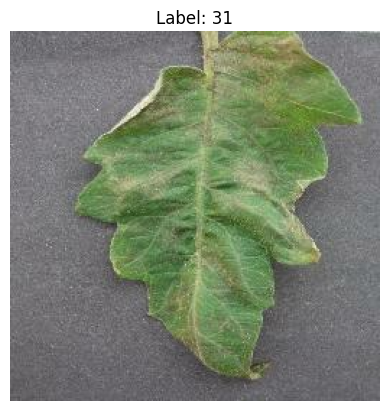

In [8]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(image_data[0])
plt.title(f"Label: {data[0]}")
plt.axis('off')  # Hide axes
plt.show()

In [9]:
label_mapping = {
   

28: "Tomato___Bacterial_spot",
29: "Tomato___Early_blight",
30: "Tomato___healthy" ,
31: "Tomato___Late_blight" ,
32: "Tomato___Leaf_Mold" ,
33: "Tomato___Septoria_leaf_spot" ,
34: "Tomato___Spider_mites Two-spotted_spider_mite" ,
35: "Tomato___Target_Spot" ,
36: "Tomato___Tomato_mosaic_virus" ,
37: "Tomato___Tomato_Yellow_Leaf_Curl_Virus" ,
}



In [10]:
# Create the list that will hold the combined data
combined_info = []

# Iterate through each image and label
for i in range(len(image_data)):
    numeric_label = data[i]
    class_label = label_mapping.get(numeric_label, "Unknown")  # Get class label from mapping
    image = image_data[i]
    
    combined_info.append({
        'Numeric Label': numeric_label,
        'Class Label': class_label,
        'Image Shape': image.shape
    })

# Example: Print the first few combined entries
for entry in combined_info[:5]:
    print(f"Numeric Label: {entry['Numeric Label']}")
    print(f"Class Label: {entry['Class Label']}")
    print(f"Image Shape: {entry['Image Shape']}")
    print()  # For

Numeric Label: 31
Class Label: Tomato___Late_blight
Image Shape: (256, 256, 3)

Numeric Label: 28
Class Label: Tomato___Bacterial_spot
Image Shape: (256, 256, 3)

Numeric Label: 31
Class Label: Tomato___Late_blight
Image Shape: (256, 256, 3)

Numeric Label: 32
Class Label: Tomato___Leaf_Mold
Image Shape: (256, 256, 3)

Numeric Label: 32
Class Label: Tomato___Leaf_Mold
Image Shape: (256, 256, 3)



SVM MODEL

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Optional: to debug GPU usage
tf.debugging.set_log_device_placement(True)

# Normalize image pixel values
image_data_flat = image_data / 255.0  # Scale to [0, 1]

# Flatten each image into a 1D array
image_data_flat = image_data_flat.reshape(image_data_flat.shape[0], -1)

# Use the label array as-is if it's already numeric
labels = data

#  Updated Label Mapping
label_mapping = {
    28: "Tomato___Target_Spot",
    29: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    30: "Tomato___Tomato_mosaic_virus",
    31: "Tomato___Late_blight",
    32: "Tomato___Leaf_Mold",
    33: "Tomato___Septoria_leaf_spot",
    34: "Tomato___Spider_mites Two-spotted_spider_mite",
    35: "Tomato___Bacterial_spot",
    36: "Tomato___Early_blight",
    37: "Tomato___healthy"
}

2025-04-18 13:58:39.783426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-18 13:58:39.957902: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-18 13:58:40.004051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-18 13:58:40.368441: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Split the dataset
x_train, x_temp, y_train, y_temp = train_test_split(
    image_data_flat, labels, test_size=0.2, stratify=labels, random_state=518
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=518
)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Train Linear SVM model
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(x_train_scaled, y_train)

# Predict on test set
y_pred = svm_model.predict(x_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=[label_mapping[i] for i in sorted(np.unique(y_test))],
            yticklabels=[label_mapping[i] for i in sorted(np.unique(y_test))])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(
    y_test, y_pred,
    target_names=[label_mapping[i] for i in sorted(np.unique(y_test))]
)
print("Classification Report:\n", report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')